In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default



In [ ]:
#dataset1 = pd.read_csv('/content/DL.1.xlsx')
!pip install --upgrade gspread


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Deeplearning').sheet1

data = worksheet.get_all_values()


dataset1 = pd.DataFrame(data[1:], columns=data[0])

dataset1 = dataset1.astype({'Input': 'int', 'Output': 'int'})

dataset1.head()


,Input,Output
0,1,90
1,2,91
2,3,92
3,4,85
4,5,87


In [ ]:
x = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1 = Scaler.transform(x_train)

In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(x_train1,y_train,epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8087.4819
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8085.8208
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8084.5146
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 8083.4277
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8082.4604
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8081.5723
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8080.7104
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8079.8418
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8079.0063
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8078.1504
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8077.3037
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8076.4287
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8075.5859
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8074.7427
Epoch 15/1000
1/1 ━━━━━━━━━━━━

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

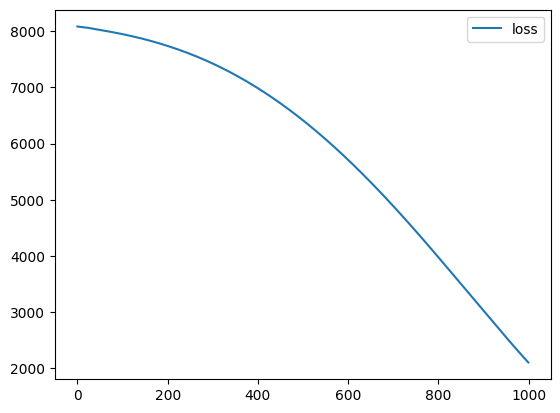

In [ ]:
loss_df.plot()

In [ ]:
x_test1 = Scaler.transform(x_test)
ai_brain.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 1907.6912


1907.691162109375

In [ ]:
x_n1=[[4]]
x_n1_1 = Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[37.734554]], dtype=float32)